<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212 entries, 0 to 211
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       212 non-null    int64  
 1   sex       212 non-null    int64  
 2   cp        212 non-null    int64  
 3   trestbps  205 non-null    float64
 4   chol      202 non-null    float64
 5   fbs       212 non-null    int64  
 6   restecg   207 non-null    float64
 7   thalach   208 non-null    float64
 8   exang     212 non-null    int64  
 9   oldpeak   200 non-null    float64
 10  slope     210 non-null    float64
 11  ca        212 non-null    int64  
 12  thal      211 non-null    float64
 13  target    212 non-null    int64  
dtypes: float64(7), int64(7)
memory usage: 23.3 KB


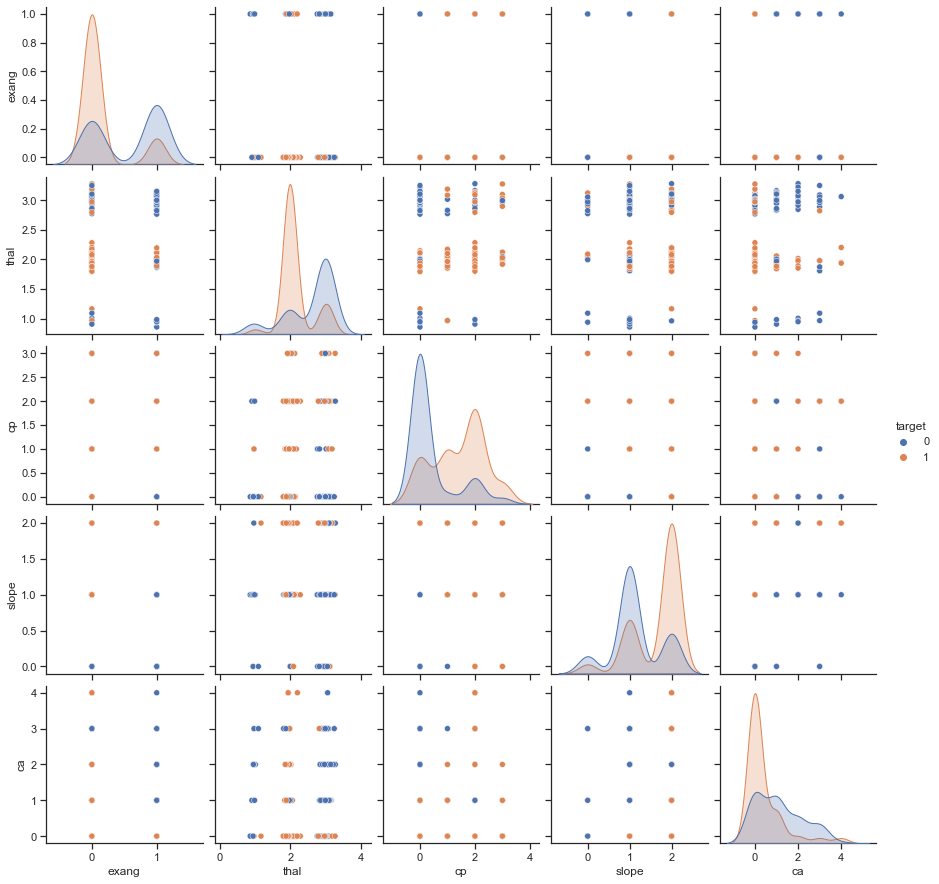

In [4]:
#import dataset in python
# Load the Pandas libraries with alias 'pd' 
import pandas as pd 
import numpy as np
data=pd.read_csv(r"C:\Users\ramee\Downloads\heart_disease_missing (1).csv")
test=pd.read_csv(r"C:\Users\ramee\Downloads\test (1).csv")
data.info()

#plot pair-plot foer most relevant predictor variables using seaborn
import seaborn as sns
#sns.countplot(x="target", data=data)
import matplotlib.pyplot as plt
sns.set(style="ticks", color_codes=True)
pair_plot=sns.pairplot(data[['exang','thal','cp','slope','target','ca']],hue="target")

d_mean
 exang     0.344340
thal      1.786730
slope     1.423810
target    0.542453
ca        0.731132
cp        0.957547
dtype: float64
d_var
 exang     0.226840
thal      0.644775
slope     0.388904
target    0.249374
ca        1.079026
cp        1.045583
dtype: float64
skew
 exang     0.659880
thal     -0.095836
slope    -0.604086
target   -0.171644
ca        1.377751
cp        0.461438
dtype: float64
kurtosis
 exang    -1.579550
thal     -0.605881
slope    -0.567830
target   -1.989397
ca        1.020304
cp       -1.240674
dtype: float64


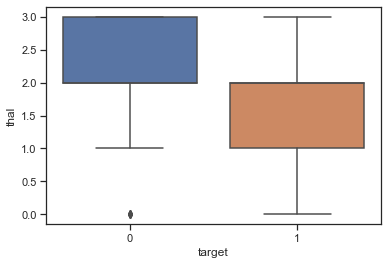

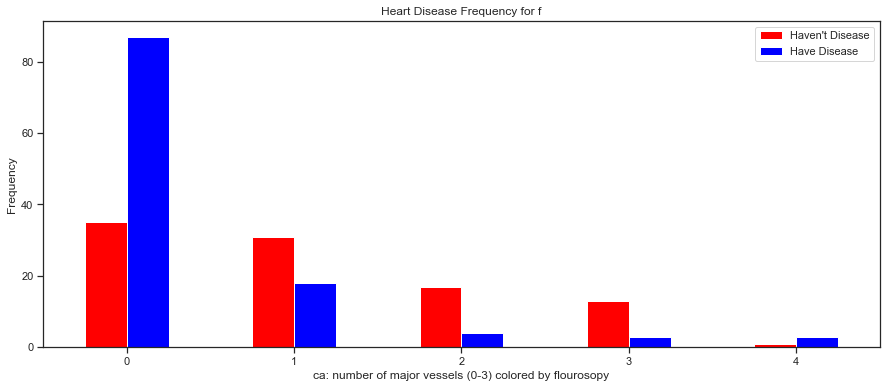

In [13]:
#removing guassian noise from thal
data['thal']=((data['thal'].apply(np.floor)))

#statistical analysis of data
from statistics import mean, median, mode, stdev
d=data[['exang','thal','slope','target','ca','cp' ]]
t=test[['exang','thal','slope','ca','cp' ]]

#print('null values\n',d.isnull().sum())
#print(data[['ca','thal','exang','cp' ,'slope']].corr())
#d=d.groupby('target')

mean_=d.mean()
print('d_mean\n',mean_)

var_=d.var()
print('d_var\n',var_)

skew_=d.skew()
print('skew\n',skew_)

kurt_=d.apply(pd.Series.kurt)
print('kurtosis\n',kurt_)

#Boxplots for outlier detection in numerical predictor variables
sns.boxplot(x='target',y='thal',data=data)

#plots for analyzing categorical variables
pd.crosstab(data.ca ,data.target).plot(kind="bar",figsize=(15,6),color=['red','blue' ])
plt.title('Heart Disease Frequency for f')
plt.xlabel('ca: number of major vessels (0-3) colored by flourosopy')
plt.xticks(rotation=0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

#Checking if the dataset is imbalanced
countNoDisease = len(data[data.target == 0])
countHaveDisease = len(data[data.target == 1])

In [14]:
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve, auc
data=data[['cp','exang','slope','ca','thal','target']]
test=test[['cp','exang','slope','ca','thal']]

#print (data.corr())

#Dropping nan values
data=data.dropna()
x_test=test.dropna()

In [15]:
# Pre-processing data

x, y = data.drop('target',axis=1), data['target']

#check size of x,y and the test set
print(x.shape)
print(y.shape)
print(x_test.shape)

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
# one hot encode input variables
onehot_encoder = OneHotEncoder(sparse=False)
x = onehot_encoder.fit_transform(x)
#ordinal encode target variable
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

x_test = onehot_encoder.fit_transform(x_test)

(209, 5)
(209,)
(91, 5)


In [16]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=275)

X_train, X_val, y_train, y_val = train_test_split( X_train, y_train, test_size=0.25, random_state=275)


xcv=np.concatenate((X_train, X_val), axis=0)
ycv=np.concatenate((y_train, y_val), axis=0)

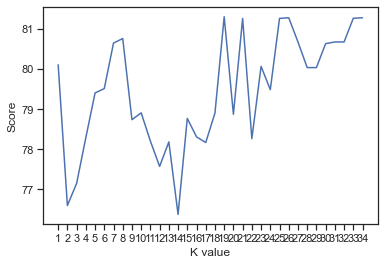

In [26]:
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve, auc
scoreList1=[]
scoreList2=[]
scoreList3=[]
#scoreList4=[]
for i in range(1,35):
   knn2 = KNeighborsClassifier(n_neighbors = i,weights='distance')  # n_neighbors means k
   knn2.fit(X_train, y_train)
   scoreList2 = cross_val_score(knn2, xcv, ycv, cv=5, scoring='f1_macro')
   scoreList3.append(scoreList2.mean()*100)
   scoreList1.append((knn2.score(X_val, y_val))*100) 

plt.plot(range(1,35), scoreList3)
plt.xticks(np.arange(1,35,1))
plt.xlabel("K value")
plt.ylabel("Score")


from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve, auc
from sklearn import metrics

scoreList1 = []
knn3 = KNeighborsClassifier(n_neighbors = 13, weights='distance')  
knn3.fit(X_train, y_train)
scoreList1.append((knn3.score(X_test, y_test))*100)